# GCC118 - Programação Matemática
## Universidade Federal de Lavras
### Instituto de Ciências Exatas e Tecnológicas
#### Profa. Andreza C. Beezão Moreira (DMM/UFLA)
#### Prof. Mayron César O. Moreira (DCC/UFLA)

*Gerando um grafo não-direcionado conexo*

## Alunos

| Nome                        | Matrícula |
|-----------------------------|-----------|
| Luiz Filipe Bartelega Penha | 202111082 |
| Vitor Pires Zini            | 202110169 |


## Modelagem Matemática

### Variáveis

1. x_i ∈ \{0, 1\} para cada vértice i ∈ V:  
   - x_i = 0: o vértice i pertence ao subconjunto V_1.
   - x_i = 1: o vértice i pertence ao subconjunto V_2.

2. y_{uv} ∈ \{0, 1\} para cada aresta (u, v) ∈ A:  
   - y_{uv} = 1: a aresta (u, v) conecta vértices de subconjuntos diferentes ( u ∈ V_1 e v ∈ V_2, ou vice-versa).
   - y_{uv} = 0: caso contrário.


### Modelo Completo

\begin{aligned}
\text{Maximizar} & \quad \sum_{(u, v) \in A} y_{uv} \\
\text{Sujeito a:} & \quad y_{uv} \leq x_u + x_v, \quad \forall (u, v) \in A \\
& \quad y_{uv} \leq 2 - (x_u + x_v), \quad \forall (u, v) \in A \\
& \quad x_i \in \{0, 1\}, \quad \forall i \in V \\
& \quad y_{uv} \in \{0, 1\}, \quad \forall (u, v) \in A
\end{aligned}


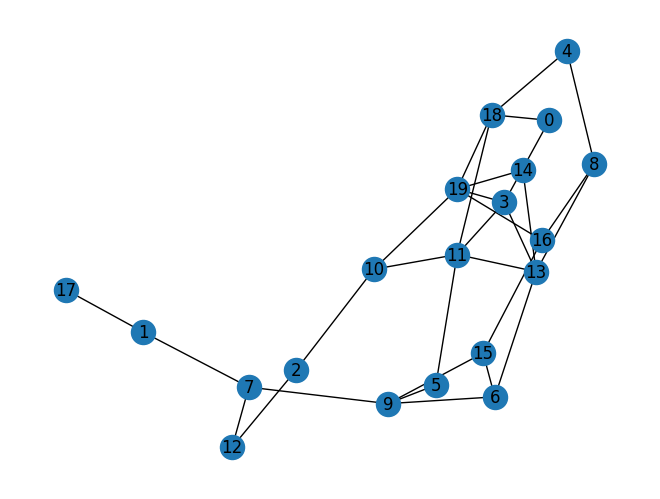

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# n: numero de vertices
# m: numero de arestas
def gera_grafo_nao_direcionado_conexo(n, m):
    if(m < n - 1 or m > n * (n - 1) // 2):
      return None

    grafo = nx.Graph()
    vertices = list(range(n))
    grafo.add_nodes_from(vertices)
    random.shuffle(vertices)
    for i in range(n - 1):
        grafo.add_edge(vertices[i], vertices[i + 1])

    while grafo.number_of_edges() < m:
        u, v = random.sample(vertices, 2)
        if not grafo.has_edge(u, v):
            grafo.add_edge(u, v)

    return grafo

n = 20
m = 30
grafo = gera_grafo_nao_direcionado_conexo(n, m)

if(grafo != None):
  nx.draw(grafo, with_labels=True)
  plt.show()


In [ ]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 51.8 MB/s eta 0:00:00


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 60 rows, 50 columns and 180 nonzeros
Model fingerprint: 0xe0765a17
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 18 rows and 18 columns
Presolve time: 0.00s
Presolved: 42 rows, 32 columns, 126 nonzeros
Found heuristic solution: objective 9.0000000
Variable types: 0 continuous, 32 integer (27 binary)
Found heuristic solution: objective 14.0000000

Root relaxation: objective 3.000000e+01, 13 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 E

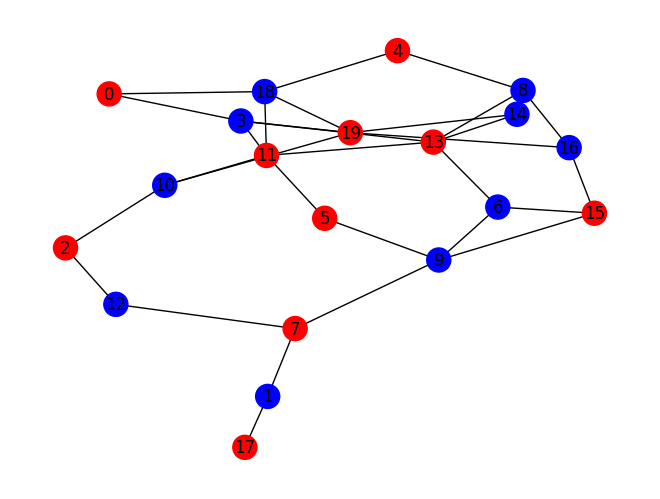

In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Inicializar o modelo Gurobi
modelo = gp.Model("maxima_cardinalidade_arestas")

if(grafo != None):
  # Variáveis de decisão
  x = modelo.addVars(grafo.nodes(), vtype=GRB.BINARY, name="x")

  arestas = [(u, v) for u, v, *_ in grafo.edges() if len((u, v)) == 2]
  y = modelo.addVars(arestas, vtype=GRB.BINARY, name="y")

  # Função objetivo: maximizar as arestas entre V1 e V2
  modelo.setObjective(gp.quicksum(y[u, v] for u, v in arestas), GRB.MAXIMIZE)

  # Restrições: definir y apenas para arestas entre subconjuntos diferentes
  for u, v in arestas:
      modelo.addConstr(y[u, v] <= x[u] + x[v], f"corte_subconjunto{u}_{v}")
      modelo.addConstr(y[u, v] <= 2 - (x[u] + x[v]), f"sem_corte_subconjunto{u}_{v}")

  # Resolver o modelo
  modelo.optimize()

  # Imprimir os resultados
  if modelo.status == GRB.OPTIMAL:
      print("Valor ótimo:", modelo.objVal)
      print("Subconjuntos:")
      V1 = [i for i in grafo.nodes() if x[i].X < 0.5]
      V2 = [i for i in grafo.nodes() if x[i].X >= 0.5]
      print("V1:", V1)
      print("V2:", V2)

  pos = nx.spring_layout(grafo)
  colors = ['red' if v in V1 else 'blue' for v in grafo.nodes()]
  nx.draw(grafo, pos, with_labels=True, node_color=colors)
  plt.show()